<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Sklearn_Perceptron_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [ ]:
print('X shape:', X.shape)
print('target:', np.unique(y))

X shape: (150, 2)
target: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (105, 2)
X_test shape: (45, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, max_iter=20, random_state=2)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=20, random_state=2)

In [ ]:
y_pred = ppn.predict(X_test_std)
dif = (y_test != y_pred).sum()
a = y_test.shape[0]
print('Misclassified samples: %d' % dif)
print('Accuracy (calculado): %.2f%%' % (100 * (a - dif) / a))

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy (sklearn.metrics): %.2f%%' %  (acc * 100))

Misclassified samples: 3
Accuracy (calculado): 93.33%
Accuracy (sklearn.metrics): 93.33%


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    # X_test,  y_test  =  X[test_idx,  :],  y[test_idx]
    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples

    if test_idx:
       # X_test, y_test = X[test_idx, :], y[test_idx]
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0, linewidth=1, marker='o', s=15, color='yellow', label='test set')

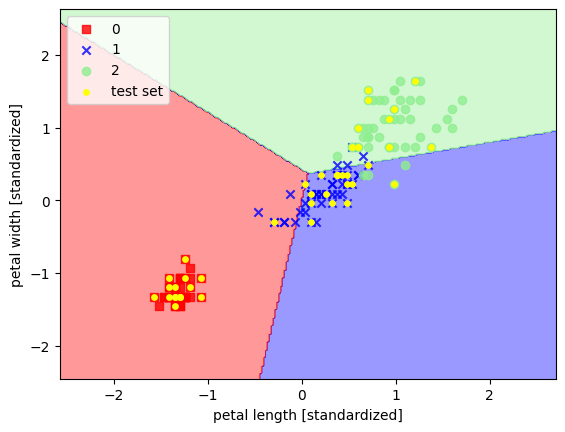

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

(1797, 64)


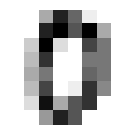

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
#plt.matshow(digits.images[0])
plt.figure(figsize=(3.5,1.5))
plt.imshow(digits.images[0].reshape(8,8), cmap=plt.cm.gray_r)
plt.axis('off')
#plt.gray()
plt.show()

In [ ]:
# Digits dataset perceptron example
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
print('X shape:', X.data.shape)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print('acuracy:', clf.score(X, y))
print('number of iterations to reach the stopping criterion:', clf.n_iter_)
print('Number of features seen during fit:', clf.n_features_in_ )

X shape: (1797, 64)
acuracy: 0.9393433500278241
number of iterations to reach the stopping criterion: 22
Number of features seen during fit: 64
